# Analysis of Brandeis classes in pandas
Here we show how to use pandas to analyze the Brandeis course data stored in data/courses

Some questions we can try to answer
* which faculty have taught the most students over the Fall2004-Summer2021 interval
* which departments offer the most courses
* which departments have had the most students
* how have the enrollents by departments changed
* etc, as in PA01

We'll show how to use pivot tables and aggregation to answer some of these.

This notebook shows how to use aggregation with groupby, pivot tables, and how to create new columns by applying some function to other columns.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

First we read in the data from Fall 2004 to Summer 2021 with minimal info about each course

In [2]:
df = pd.read_csv('data2/classes/courses.csv')
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


In [3]:
import json
result = df.to_json(orient="split")
parsed = json.loads(result)
z = json.dumps(parsed, indent=4) 
len(z)
jfile = open('data2/courses_2005-2020.json','w')
jfile.write(z)
jfile.close()

# Finding teachers with the most students
The easiest way to do this is with a groupby it shows the three stages of groupby
1. grouping of rows together based on the value in a column ('inst')
1. projection of those rows into a set of values (what value are we interested in) (enr)
1. aggregation of those values into a single value with some operator from arrays to numbers (sum)

In [4]:
#fac = df.groupby(['inst','subject'])['enr'].agg(sum)
#fac
fac = df.groupby(['inst','subj'])
fac = fac['enr'].agg([sum, np.mean, np.max,len])
fac = fac.sort_values(ascending=False,by='sum')
fac.head(40)



,,sum,mean,amax,len
inst,subj,,,,
"Coiner, Harry",ECON,8646,118.438356,203,73
"Dolnik, Milos",CHEM,8354,31.288390,73,267
"Kosinski-Collins, Melissa",BIOL,6654,47.191489,87,141
"Wright, Ellen",PSYC,4970,71.000000,193,70
"Novack, Claudia",CHEM,4598,35.643411,88,129
"Mascall, Kristen",CHEM,4577,52.011364,226,88
"Teuber, Andreas",PHIL,4362,82.301887,199,53
"Di Lillo, Antonella",COSI,4357,65.029851,149,67
"Van Der Meid, J.",OFFC,4099,132.225806,214,31


In [5]:

df[ df['inst']=='Perlman, Dan' ].groupby('title')['enr'].agg([sum, len, np.mean])

,sum,len,mean
title,,,
ANIMAL BEHAVIOR,94,4,23.500000
BIOLOGY OF FISHES,27,4,6.750000
BIOLOGY OF WHALES,56,4,14.000000
CLIMATE CHANGE BIODIVERSITY,33,1,33.000000
COASTAL ZONE MANAGEMENT,6,1,6.000000
CONSERVATION BIOLOGY,187,7,26.714286
ECOLOGY,200,3,66.666667
EVOLUTIONARY ECOLOGY,108,3,36.000000
EXPERIENTIAL LEARNING PRACTICM,22,2,11.000000


## Sorting the Series
We can sort the values if we want (and here I am then reversing them by iterating with a step of -1 through the array) and we can use .head(N) and .tail(N) to look at either end of the sorted series.

In [6]:
#fac = fac.sort_values(ascending=False)
#fac.head(20)


In [7]:
fac.head(1010).tail(10)

,,sum,mean,amax,len
inst,subj,,,,
"Miller, Gene",BUS,142,14.200000,22,10
"Yepez, Carlos",HS,142,35.500000,54,4
"Baer, Carole Ann",HWL,142,17.750000,35,8
"Lu, Anh-Dai",HS,142,23.666667,30,6
"LaRochelle, Ryan",POL,142,17.750000,27,8
"Paradis, Suzanne G.",NBIO,142,47.333333,61,3
"Perlman, Dan L",ENVS,141,141.000000,141,1
"Street, Timothy",BCHM,141,35.250000,42,4
"Pichler, Pegaret",ECON,141,28.200000,34,5


In [8]:
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


# Finding departments (subj) with the most students per year
Let's do another example of aggregation, to sum the enrollments for each department over all years

In [9]:
depts = df.groupby('subj')['enr'].agg(sum)
depts

subj
AAAS         4347
AAAS/ENG       67
AAAS/FA        52
AAAS/HIS       48
AAAS/WGS      322
            ...  
UWS         14015
WGS           282
WMGS         2697
WMNS          122
YDSH          424
Name: enr, Length: 180, dtype: int64

It is more interesting to look at enrollments per year

In [10]:
def div17(x):
    return x/17
depts = depts.apply(div17)
depts

subj
AAAS        255.705882
AAAS/ENG      3.941176
AAAS/FA       3.058824
AAAS/HIS      2.823529
AAAS/WGS     18.941176
               ...    
UWS         824.411765
WGS          16.588235
WMGS        158.647059
WMNS          7.176471
YDSH         24.941176
Name: enr, Length: 180, dtype: float64

In [11]:
depts = depts.sort_values()
depts = depts[::-1]
depts.head(20)

subj
HS      4158.235294
ECON    2735.235294
BIOL    2519.294118
BUS     2293.647059
CHEM    2209.000000
FIN     1765.352941
MATH    1462.941176
PSYC    1433.058824
COSI    1297.235294
FA      1119.941176
POL     1090.823529
ENG     1072.882353
PHYS    1058.941176
HIST    1057.352941
ANTH    1032.117647
SOC     1006.941176
MUS      972.470588
THA      917.235294
PHIL     914.882353
PE       872.294118
Name: enr, dtype: float64

# Restricting to a time interval
Let's do the same but just look for the past 4 years, i.e. from Fall2017 to Summer 2021 which are the codes 1173 to 1212.


In [12]:
df2 = df[df['code']>=1193]
df2
#islater = df['code']>= 1173
#df[islater]

,subj,num,suf,format,term,code,inst,title,sec,enr
2040,ANTH,129,A,LAB,Fall 2019,1193,"Golden, Charles",CULTURE IN 3D:THEORY&ETHICS,1,16
2041,EL,70,A,LAB,Fall 2019,1193,"Merrill, Keith",FAC STUDENT PARTNERSHIP PROG,1,6
2042,EL,13,A,LAB,Fall 2019,1193,"Dellelo, Mark",MULTIMEDIA STORYTELLING PRAC,1,9
2043,EL,42,A,LAB,Fall 2019,1193,"Lamb, Sarah",LIFE COURSE GENERATIONS PRAC,1,12
2044,BIOL,152,B,LAB,Fall 2019,1193,"Marr, Michael",VIRUS HUNTER LAB,1,5
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


## aggregate by summing the enrollments for each subject

In [13]:
depts = df2.groupby(['subj'])['enr'].agg(sum)
depts = depts.sort_values(ascending=False)
depts.head(20)
                     


subj
HS      9631
BIOL    6063
BUS     5877
HWL     4877
ECON    4704
CHEM    4504
COSI    4340
MATH    3604
PSYC    3025
FIN     2892
ANTH    2138
FA      2017
SOC     1994
PHYS    1989
ENG     1972
PHIL    1867
MUS     1823
POL     1783
HIST    1767
UWS     1662
Name: enr, dtype: int64

# Time series
Now lets try to get time series data and plot the enrollments in a department by year.
Let's first add a new column giving the academic year, so Fall2004 and Spring 2005 and Summer2005 would all be 2004


In [14]:
def code2year(code):
    ''' returns the academic year corresponding to a code'''
    code=str(code)
    year = int("20"+code[1:-1])
    if code[-1]!='3':
        year = year -1
    return year
print(code2year('1051'))



2004


### the original data frame has no 'year' column

In [15]:
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


### create a new column for the year
We can apply the code2year function to each of the integers in the 'code' column to get a new series,
and then assign that series to be a new column 'year' of the df dataframe

In [16]:
df['year'] = df['code'].apply(code2year)
df

,subj,num,suf,format,term,code,inst,title,sec,enr,year
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32,2004
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18,2004
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14,2004
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11,2004
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3,2004
...,...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9,2020
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4,2020
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3,2020
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3,2020


# Group by the year and subject
This creates a new Series with a multi-index containing both year and subject

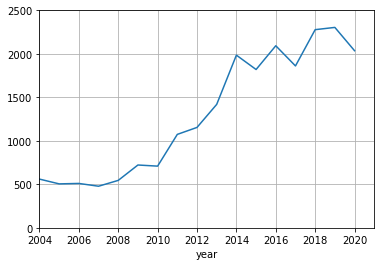

In [17]:
depts_enr = df.groupby(['subj','year'])['enr'].agg(sum)
depts_enr['COSI'].plot()
plt.axis([2004,2021,0,2500])
plt.grid()


In [18]:
depts_enr = df.groupby(['year','subj'])['enr'].agg(sum)
depts_enr

year  subj
2004  AAAS    170
      AMST    901
      ANTH    969
      ARBC    101
      BCHM    179
             ... 
2020  SOC     907
      THA     511
      UWS     746
      WGS     282
      YDSH     24
Name: enr, Length: 1674, dtype: int64

# Reset to a single index
We can use the reset_index method to make the subj part of the index into a column


In [19]:
depts_enr = depts_enr.reset_index(level=['subj'])
depts_enr

,subj,enr
year,,
2004,AAAS,170
2004,AMST,901
2004,ANTH,969
2004,ARBC,101
2004,BCHM,179
...,...,...
2020,SOC,907
2020,THA,511
2020,UWS,746


# Create a Pivot table of enrollments by department and year
Now we do the usual construction of a pivot table

In [20]:
depts_pt =  pd.pivot_table(depts_enr, values='enr', index=["year"], columns=["subj"])
depts_pt

subj,AAAS,AAAS/ENG,AAAS/FA,AAAS/HIS,AAAS/WGS,AAPI,AAPI/HIS,AAPI/WGS,AAS/AAPI,AMST,...,SQS,SYS,THA,TYP,USEM,UWS,WGS,WMGS,WMNS,YDSH
year,,,,,,,,,,,,,,,,,,,,,
2004,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901.0,...,NaN,NaN,1009.0,NaN,866.0,489.0,NaN,NaN,122.0,51.0
2005,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,907.0,...,NaN,NaN,1062.0,128.0,842.0,400.0,NaN,165.0,NaN,35.0
2006,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997.0,...,NaN,NaN,1082.0,144.0,864.0,495.0,NaN,210.0,NaN,32.0
2007,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,...,NaN,NaN,1037.0,151.0,804.0,822.0,NaN,187.0,NaN,29.0
2008,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819.0,...,NaN,NaN,972.0,147.0,897.0,869.0,NaN,141.0,NaN,5.0
2009,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.0,...,NaN,22.0,1009.0,141.0,NaN,917.0,NaN,149.0,NaN,31.0
2010,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744.0,...,NaN,27.0,1002.0,154.0,NaN,866.0,NaN,191.0,NaN,37.0
2011,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579.0,...,NaN,18.0,1071.0,154.0,NaN,989.0,NaN,168.0,NaN,40.0
2012,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696.0,...,NaN,22.0,986.0,147.0,NaN,939.0,NaN,163.0,NaN,33.0


# Plot selected columns of the pivot table
We can now select a few columns and plot them!

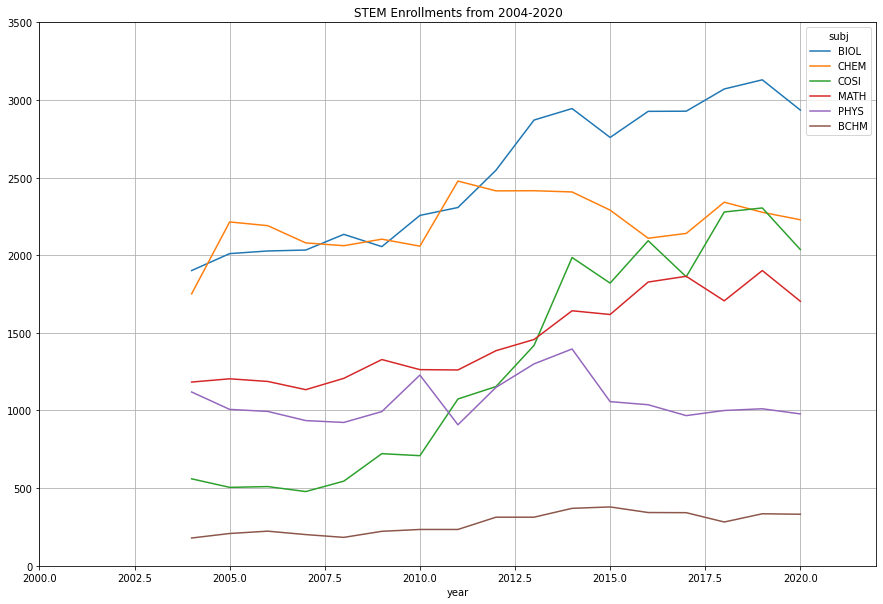

In [22]:
depts_pt[['BIOL','CHEM','COSI','MATH','PHYS','BCHM']].plot(figsize=(15,10))
plt.grid()
plt.title("STEM Enrollments from 2004-2020")
plt.axis([2000,2022,0,3500])
plt.savefig('images/stemenr.png')

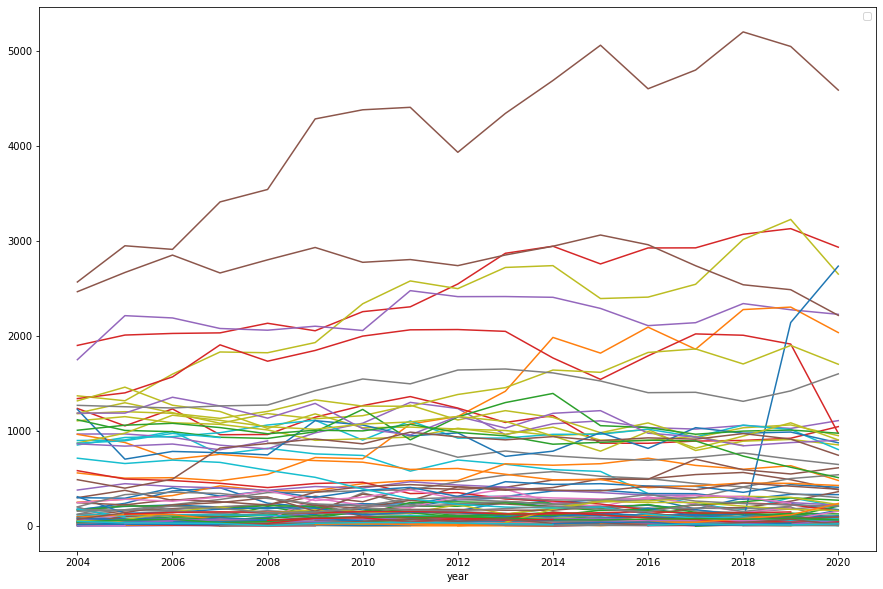

In [23]:
depts_pt.plot(figsize=(15,10))
plt.legend([])

## Most popular course at Brandeis

In [ ]:
df

In [24]:
df2 = df[df['code']>1042]
courses = df2.groupby(['title'])['enr'].agg(sum)
courses.sort_values(inplace=True,ascending=False)
courses.head(10)

title
UNIVERSITY WRITING SEM.     13059
GENERAL BIOLOGY LAB          7533
INTRO TO PSYCHOLOGY          5174
ORGANIC CHEMISTRY, LECS.     5072
Off Campus Study             4780
FINANCIAL ACCOUNTING         4699
TECHNIQUES-CALCULUS (A)      4602
GENERAL CHEMISTRY LAB I      4429
INTRO TO ECONOMICS           4403
INTRO-COMP ST. HUMAN SOC     4344
Name: enr, dtype: int64

In [25]:
fac = df.groupby('title')
fac = fac['enr'].agg([sum])
fac = fac.sort_values(ascending=False, by='sum').head(10)
fac

,sum
title,
UNIVERSITY WRITING SEM.,13059
GENERAL BIOLOGY LAB,7533
INTRO TO PSYCHOLOGY,5174
"ORGANIC CHEMISTRY, LECS.",5072
Off Campus Study,4780
FINANCIAL ACCOUNTING,4699
TECHNIQUES-CALCULUS (A),4602
GENERAL CHEMISTRY LAB I,4429
INTRO TO ECONOMICS,4403


In [26]:
popcourses = df.groupby('title')['enr'].agg([sum]).sort_values(ascending=False, by='sum').head(10)
popcourses


,sum
title,
UNIVERSITY WRITING SEM.,13059
GENERAL BIOLOGY LAB,7533
INTRO TO PSYCHOLOGY,5174
"ORGANIC CHEMISTRY, LECS.",5072
Off Campus Study,4780
FINANCIAL ACCOUNTING,4699
TECHNIQUES-CALCULUS (A),4602
GENERAL CHEMISTRY LAB I,4429
INTRO TO ECONOMICS,4403
